# Customer Happiness Index Prediction

**Made by: Group 6 in partial completion of Pattern Recognition Class**
 - Timothy Chan
 - Rhyle Nodnylson Guinto
 - Chino Laguda
 - Randall Joseph Pajaro

## Importing required libraries and dataset

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Markdown as md

In [2]:
df = pd.read_csv('telco_dataset.csv')
df.head()

,Customer_ID,subscription_type,start_date,years_active,no_of_other_postpaid_accounts,frequent_availed_top_up_amount_30days,postpaid_plan_30days,monthly_revenue,no_of_top_ups_30days,last_date_top_up,...,no_of_days_subscribed_to_OtherApps_30days,total_hours_internet_usage_30days,total_hours_OtherApps_usage_30days,no_of_failed_Call_Text_30days,no_of_failed_Surfing_30days,no_of_failed_143hotline_30days,no_of_call_records_Complaint_30days,mins_of_call_records_Complaint_30days,no_of_logged_GlobeOne_30days,Survey_Score
0,0917-2849660931,postpaid,04/06/2010,9.30,0,116,999,1115,1,5/19/2019,...,23,234,234,20,18,7,4,3,14,7
1,0917-3521446959,prepaid,05/07/2014,5.16,0,100,0,300,2,4/14/2019,...,3,136,20,28,20,11,5,23,9,3
2,0917-6526588656,postpaid,09/06/2017,1.78,0,200,599,799,1,5/18/2019,...,26,139,247,5,4,6,9,13,9,0
3,0917-8987002220,prepaid,10/08/2013,5.75,0,300,0,499,2,5/30/2019,...,26,78,119,17,27,25,4,27,16,0
4,0917-5353179110,prepaid,7/28/2011,7.98,0,100,0,400,5,4/23/2019,...,0,258,113,30,11,9,2,3,1,0


## User Profile

In [3]:
# For cleanliness and understanding purposes, the results of the ratings shall be placed in a new dataframe called "data"
data = pd.DataFrame()

# sub_type_rating
data['subscription_type_rating'] = np.where(df['subscription_type']=='postpaid', 10, 5)


# years_active_rating
conditions = [
    (df['years_active'] < 1),
    (df['years_active'] >= 1) & (df['years_active'] <= 2),
    (df['years_active'] > 2) & (df['years_active'] <= 4),
    (df['years_active'] > 4) & (df['years_active'] <= 6),
    (df['years_active'] > 6) & (df['years_active'] <= 8),
    (df['years_active'] > 8)    
]
values = [5, 6, 7, 8, 9, 10]
data['years_active_rating'] = np.select(conditions, values)


# other_postpaid_accts rating
conditions = [
    (df['no_of_other_postpaid_accounts'] >= 0) & (df['no_of_other_postpaid_accounts'] <= 1),
    (df['no_of_other_postpaid_accounts'] >= 2) & (df['no_of_other_postpaid_accounts'] <= 3),
    (df['no_of_other_postpaid_accounts'] >= 4) & (df['no_of_other_postpaid_accounts'] <= 5)
]
values = [8, 9, 10]
data['no_of_other_postpaid_accounts_rating'] = np.select(conditions, values)

In [4]:
data.head()

,subscription_type_rating,years_active_rating,no_of_other_postpaid_accounts_rating
0,10,10,8
1,5,8,8
2,10,6,8
3,5,8,8
4,5,9,8


## Load Profile

In [5]:
# frequent_availed_top_up_amount_30days rating
conditions = [
    (df['frequent_availed_top_up_amount_30days'] == 0),
    (df['frequent_availed_top_up_amount_30days'] > 0) & (df['frequent_availed_top_up_amount_30days'] <= 50),
    (df['frequent_availed_top_up_amount_30days'] > 50) & (df['frequent_availed_top_up_amount_30days'] <= 100),
    (df['frequent_availed_top_up_amount_30days'] > 100) & (df['frequent_availed_top_up_amount_30days'] <= 200),
    (df['frequent_availed_top_up_amount_30days'] > 200) & (df['frequent_availed_top_up_amount_30days'] <= 300),
    (df['frequent_availed_top_up_amount_30days'] > 300) & (df['frequent_availed_top_up_amount_30days'] <= 500),
    (df['frequent_availed_top_up_amount_30days'] > 500)
]
values = [0,3,5,7,8,9,10]
data['freq_avail_top_up_30d_rating'] = np.select(conditions, values)


# no_of_top_ups_30days rating
conditions = [
    (df['no_of_top_ups_30days'] == 0),
    (df['no_of_top_ups_30days'] == 1),
    (df['no_of_top_ups_30days'] == 2),
    (df['no_of_top_ups_30days'] >= 3) & (df['no_of_top_ups_30days'] <= 4),
    (df['no_of_top_ups_30days'] >= 5) & (df['no_of_top_ups_30days'] <= 7),
    (df['no_of_top_ups_30days'] >= 8) & (df['no_of_top_ups_30days'] <= 10)
]
values = [0,5,6,7,9,10]
data['no_of_top_ups_30days_rating'] = np.select(conditions, values)


# days_since_last_two_top_ups rating
conditions = [
    (df['days_since_last_two_top_ups'] > 51),
    (df['days_since_last_two_top_ups'] >= 41) & (df['days_since_last_two_top_ups'] <= 50),
    (df['days_since_last_two_top_ups'] >= 31) & (df['days_since_last_two_top_ups'] <= 40),
    (df['days_since_last_two_top_ups'] >= 22) & (df['days_since_last_two_top_ups'] <= 30),
    (df['days_since_last_two_top_ups'] >= 15) & (df['days_since_last_two_top_ups'] <= 21),
    (df['days_since_last_two_top_ups'] >= 10) & (df['days_since_last_two_top_ups'] <= 14),
    (df['days_since_last_two_top_ups'] < 10)  
]
values = [0,3,5,7,8,9,10]
data['days_since_last_two_top_ups_rating'] = np.select(conditions, values)

In [6]:
data.head()

,subscription_type_rating,years_active_rating,no_of_other_postpaid_accounts_rating,freq_avail_top_up_30d_rating,no_of_top_ups_30days_rating,days_since_last_two_top_ups_rating
0,10,10,8,7,5,8
1,5,8,8,5,6,0
2,10,6,8,7,5,8
3,5,8,8,8,6,10
4,5,9,8,5,9,3


## Subscription Profile

In [7]:
# no_of_days_subscribed_to_Call_Text_30days rating
conditions = [
    (df['no_of_days_subscribed_to_Call_Text_30days'] == 0),
    (df['no_of_days_subscribed_to_Call_Text_30days'] >= 1) & (df['no_of_days_subscribed_to_Call_Text_30days'] <= 2),
    (df['no_of_days_subscribed_to_Call_Text_30days'] >= 3) & (df['no_of_days_subscribed_to_Call_Text_30days'] <= 7),
    (df['no_of_days_subscribed_to_Call_Text_30days'] >= 8) & (df['no_of_days_subscribed_to_Call_Text_30days'] <= 14),
    (df['no_of_days_subscribed_to_Call_Text_30days'] >= 15) & (df['no_of_days_subscribed_to_Call_Text_30days'] <= 21),
    (df['no_of_days_subscribed_to_Call_Text_30days'] >= 21) & (df['no_of_days_subscribed_to_Call_Text_30days'] <= 29),
    (df['no_of_days_subscribed_to_Call_Text_30days'] == 30)
]
values = [1,3,5,7,8,9,10]
data['no_of_days_subscribed_to_Call_Text_30days_rating'] = np.select(conditions, values)

# no_of_days_subscribed_to_GoSurf_30days rating
conditions = [
    (df['no_of_days_subscribed_to_GoSurf_30days'] == 0),
    (df['no_of_days_subscribed_to_GoSurf_30days'] >= 1) & (df['no_of_days_subscribed_to_GoSurf_30days'] <= 2),
    (df['no_of_days_subscribed_to_GoSurf_30days'] >= 3) & (df['no_of_days_subscribed_to_GoSurf_30days'] <= 7),
    (df['no_of_days_subscribed_to_GoSurf_30days'] >= 8) & (df['no_of_days_subscribed_to_GoSurf_30days'] <= 14),
    (df['no_of_days_subscribed_to_GoSurf_30days'] >= 15) & (df['no_of_days_subscribed_to_GoSurf_30days'] <= 21),
    (df['no_of_days_subscribed_to_GoSurf_30days'] >= 21) & (df['no_of_days_subscribed_to_GoSurf_30days'] <= 29),
    (df['no_of_days_subscribed_to_GoSurf_30days'] == 30)
]
values = [1,3,5,7,8,9,10]
data['no_of_days_subscribed_to_GoSurf_30days_rating'] = np.select(conditions, values)


# no_of_days_subscribed_to_GoWatch_30days rating
conditions = [
    (df['no_of_days_subscribed_to_GoWatch_30days'] >= 0) & (df['no_of_days_subscribed_to_GoWatch_30days'] <= 2),
    (df['no_of_days_subscribed_to_GoWatch_30days'] >= 3) & (df['no_of_days_subscribed_to_GoWatch_30days'] <= 7),
    (df['no_of_days_subscribed_to_GoWatch_30days'] >= 8) & (df['no_of_days_subscribed_to_GoWatch_30days'] <= 14),
    (df['no_of_days_subscribed_to_GoWatch_30days'] >= 15) & (df['no_of_days_subscribed_to_GoWatch_30days'] <= 21),
    (df['no_of_days_subscribed_to_GoWatch_30days'] >= 21) & (df['no_of_days_subscribed_to_GoWatch_30days'] <= 29),
    (df['no_of_days_subscribed_to_GoWatch_30days'] == 30)
]
values = [5,6,7,8,9,10]
data['no_of_days_subscribed_to_GoWatch_30days_rating'] = np.select(conditions, values)


# no_of_days_subscribed_to_OtherApps_30days rating
conditions = [
    (df['no_of_days_subscribed_to_OtherApps_30days'] >= 0) & (df['no_of_days_subscribed_to_OtherApps_30days'] <= 2),
    (df['no_of_days_subscribed_to_OtherApps_30days'] >= 3) & (df['no_of_days_subscribed_to_OtherApps_30days'] <= 7),
    (df['no_of_days_subscribed_to_OtherApps_30days'] >= 8) & (df['no_of_days_subscribed_to_OtherApps_30days'] <= 14),
    (df['no_of_days_subscribed_to_OtherApps_30days'] >= 15) & (df['no_of_days_subscribed_to_OtherApps_30days'] <= 21),
    (df['no_of_days_subscribed_to_OtherApps_30days'] >= 21) & (df['no_of_days_subscribed_to_OtherApps_30days'] <= 29),
    (df['no_of_days_subscribed_to_OtherApps_30days'] == 30)
]
values = [5,6,7,8,9,10]
data['no_of_days_subscribed_to_OtherApps_30days_rating'] = np.select(conditions, values)

In [8]:
data.head()

,subscription_type_rating,years_active_rating,no_of_other_postpaid_accounts_rating,freq_avail_top_up_30d_rating,no_of_top_ups_30days_rating,days_since_last_two_top_ups_rating,no_of_days_subscribed_to_Call_Text_30days_rating,no_of_days_subscribed_to_GoSurf_30days_rating,no_of_days_subscribed_to_GoWatch_30days_rating,no_of_days_subscribed_to_OtherApps_30days_rating
0,10,10,8,7,5,8,10,10,8,9
1,5,8,8,5,6,0,8,7,8,6
2,10,6,8,7,5,8,10,10,7,9
3,5,8,8,8,6,10,9,7,8,9
4,5,9,8,5,9,3,5,5,10,5


## Customer Experience Profile

In [9]:
# no_of_failed_Call_Text_30days rating
conditions = [
    (df['no_of_failed_Call_Text_30days'] > 29),
    (df['no_of_failed_Call_Text_30days'] >= 26) & (df['no_of_failed_Call_Text_30days'] <= 28),
    (df['no_of_failed_Call_Text_30days'] >= 21) & (df['no_of_failed_Call_Text_30days'] <= 25),
    (df['no_of_failed_Call_Text_30days'] >= 16) & (df['no_of_failed_Call_Text_30days'] <= 20),
    (df['no_of_failed_Call_Text_30days'] >= 11) & (df['no_of_failed_Call_Text_30days'] <= 15),
    (df['no_of_failed_Call_Text_30days'] >= 6) & (df['no_of_failed_Call_Text_30days'] <= 10),
    (df['no_of_failed_Call_Text_30days'] >= 0) & (df['no_of_failed_Call_Text_30days'] <= 5)
]
values = [0,1,3,5,7,9,10]
data['no_of_failed_Call_Text_30days_rating'] = np.select(conditions, values)


# no_of_failed_Surfing_30days rating
conditions = [
    (df['no_of_failed_Surfing_30days'] > 29),
    (df['no_of_failed_Surfing_30days'] >= 26) & (df['no_of_failed_Surfing_30days'] <= 28),
    (df['no_of_failed_Surfing_30days'] >= 21) & (df['no_of_failed_Surfing_30days'] <= 25),
    (df['no_of_failed_Surfing_30days'] >= 16) & (df['no_of_failed_Surfing_30days'] <= 20),
    (df['no_of_failed_Surfing_30days'] >= 11) & (df['no_of_failed_Surfing_30days'] <= 15),
    (df['no_of_failed_Surfing_30days'] >= 6) & (df['no_of_failed_Surfing_30days'] <= 10),
    (df['no_of_failed_Surfing_30days'] >= 0) & (df['no_of_failed_Surfing_30days'] <= 5)
]
values = [0,1,3,5,7,9,10]
data['no_of_failed_Surfing_30days_rating'] = np.select(conditions, values)


# no_of_failed_143hotline_30days rating
conditions = [
    (df['no_of_failed_143hotline_30days'] > 29),
    (df['no_of_failed_143hotline_30days'] >= 26) & (df['no_of_failed_143hotline_30days'] <= 28),
    (df['no_of_failed_143hotline_30days'] >= 21) & (df['no_of_failed_143hotline_30days'] <= 25),
    (df['no_of_failed_143hotline_30days'] >= 16) & (df['no_of_failed_143hotline_30days'] <= 20),
    (df['no_of_failed_143hotline_30days'] >= 11) & (df['no_of_failed_143hotline_30days'] <= 15),
    (df['no_of_failed_143hotline_30days'] >= 6) & (df['no_of_failed_143hotline_30days'] <= 10),
    (df['no_of_failed_143hotline_30days'] >= 0) & (df['no_of_failed_143hotline_30days'] <= 5)
]
values = [0,1,3,5,7,9,10]
data['no_of_failed_143hotline_30days_rating'] = np.select(conditions, values)

In [10]:
data.head()

,subscription_type_rating,years_active_rating,no_of_other_postpaid_accounts_rating,freq_avail_top_up_30d_rating,no_of_top_ups_30days_rating,days_since_last_two_top_ups_rating,no_of_days_subscribed_to_Call_Text_30days_rating,no_of_days_subscribed_to_GoSurf_30days_rating,no_of_days_subscribed_to_GoWatch_30days_rating,no_of_days_subscribed_to_OtherApps_30days_rating,no_of_failed_Call_Text_30days_rating,no_of_failed_Surfing_30days_rating,no_of_failed_143hotline_30days_rating
0,10,10,8,7,5,8,10,10,8,9,5,5,9
1,5,8,8,5,6,0,8,7,8,6,1,5,7
2,10,6,8,7,5,8,10,10,7,9,10,10,9
3,5,8,8,8,6,10,9,7,8,9,5,1,3
4,5,9,8,5,9,3,5,5,10,5,0,7,9


## Customer Support Engagement Profile

In [11]:
# no_of_call_records_Complaint_30days rating
conditions = [
    (df['no_of_call_records_Complaint_30days'] == 10),
    (df['no_of_call_records_Complaint_30days'] >= 8) & (df['no_of_call_records_Complaint_30days'] <= 9),
    (df['no_of_call_records_Complaint_30days'] >= 6) & (df['no_of_call_records_Complaint_30days'] <= 7),
    (df['no_of_call_records_Complaint_30days'] >= 4) & (df['no_of_call_records_Complaint_30days'] <= 5),
    (df['no_of_call_records_Complaint_30days'] >= 2) & (df['no_of_call_records_Complaint_30days'] <= 3),
    (df['no_of_call_records_Complaint_30days'] >= 0) & (df['no_of_call_records_Complaint_30days'] <= 1)
]
values = [0,2,5,7,9,10]
data['no_of_call_records_Complaint_30days_rating'] = np.select(conditions, values)


# mins_of_call_records_Complaint_30days rating
conditions = [
    (df['mins_of_call_records_Complaint_30days'] > 25),
    (df['mins_of_call_records_Complaint_30days'] >= 21) & (df['mins_of_call_records_Complaint_30days'] <= 25),
    (df['mins_of_call_records_Complaint_30days'] >= 16) & (df['mins_of_call_records_Complaint_30days'] <= 20),
    (df['mins_of_call_records_Complaint_30days'] >= 11) & (df['mins_of_call_records_Complaint_30days'] <= 15),
    (df['mins_of_call_records_Complaint_30days'] >= 6) & (df['mins_of_call_records_Complaint_30days'] <= 10),
    (df['mins_of_call_records_Complaint_30days'] >= 1) & (df['mins_of_call_records_Complaint_30days'] <= 5),
    (df['mins_of_call_records_Complaint_30days'] == 0)
]
values = [0,2,4,6,8,9,10]
data['mins_of_call_records_Complaint_30days_rating'] = np.select(conditions, values)


# no_of_logged_GlobeOne_30days rating
conditions = [
    (df['no_of_logged_GlobeOne_30days'] >= 0) & (df['no_of_logged_GlobeOne_30days'] <= 2),
    (df['no_of_logged_GlobeOne_30days'] >= 3) & (df['no_of_logged_GlobeOne_30days'] <= 7),
    (df['no_of_logged_GlobeOne_30days'] >= 8) & (df['no_of_logged_GlobeOne_30days'] <= 14),
    (df['no_of_logged_GlobeOne_30days'] >= 15) & (df['no_of_logged_GlobeOne_30days'] <= 21),
    (df['no_of_logged_GlobeOne_30days'] >= 21) & (df['no_of_logged_GlobeOne_30days'] <= 29),
    (df['no_of_logged_GlobeOne_30days'] == 30)
]
values = [5,6,7,8,9,10]
data['no_of_logged_GlobeOne_30days_rating'] = np.select(conditions, values)

In [12]:
data.head()

,subscription_type_rating,years_active_rating,no_of_other_postpaid_accounts_rating,freq_avail_top_up_30d_rating,no_of_top_ups_30days_rating,days_since_last_two_top_ups_rating,no_of_days_subscribed_to_Call_Text_30days_rating,no_of_days_subscribed_to_GoSurf_30days_rating,no_of_days_subscribed_to_GoWatch_30days_rating,no_of_days_subscribed_to_OtherApps_30days_rating,no_of_failed_Call_Text_30days_rating,no_of_failed_Surfing_30days_rating,no_of_failed_143hotline_30days_rating,no_of_call_records_Complaint_30days_rating,mins_of_call_records_Complaint_30days_rating,no_of_logged_GlobeOne_30days_rating
0,10,10,8,7,5,8,10,10,8,9,5,5,9,7,9,7
1,5,8,8,5,6,0,8,7,8,6,1,5,7,7,2,7
2,10,6,8,7,5,8,10,10,7,9,10,10,9,2,6,7
3,5,8,8,8,6,10,9,7,8,9,5,1,3,7,0,8
4,5,9,8,5,9,3,5,5,10,5,0,7,9,9,9,5


## Customer Profile

In [13]:
# creating a dataframe called cp (customer profile) with the rating contents of user profile, load profile, sub profile, customer exp, and customer support engagement
cp = pd.DataFrame()

cp = cp.assign(user_profile=((data['subscription_type_rating'] + data['years_active_rating'] + data['no_of_other_postpaid_accounts_rating'])/30)*100)
cp = cp.assign(load_profile=((data['freq_avail_top_up_30d_rating'] + data['no_of_top_ups_30days_rating'] + data['days_since_last_two_top_ups_rating'])/30)*100)
cp = cp.assign(subscription_profile=((data['no_of_days_subscribed_to_Call_Text_30days_rating'] + data['no_of_days_subscribed_to_GoSurf_30days_rating'] + data['no_of_days_subscribed_to_GoWatch_30days_rating'] + data['no_of_days_subscribed_to_OtherApps_30days_rating'])/40)*100)
cp = cp.assign(customer_experience_profile=(((data['no_of_failed_Call_Text_30days_rating'] + data['no_of_failed_Surfing_30days_rating'] + data['no_of_failed_143hotline_30days_rating'])/30)*100))
cp = cp.assign(customer_support_engagement_profile=(((data['no_of_call_records_Complaint_30days_rating'] + data['mins_of_call_records_Complaint_30days_rating'] + data['no_of_logged_GlobeOne_30days_rating'])/30)*100))

In [14]:
cp = cp.assign(customer_profile=((cp['user_profile'] + cp['load_profile'] + cp['subscription_profile'] + cp['customer_experience_profile'] + cp['customer_support_engagement_profile'])/500)*100).astype('int')

In [15]:
cp.head()

,user_profile,load_profile,subscription_profile,customer_experience_profile,customer_support_engagement_profile,customer_profile
0,93,66,92,63,76,78
1,70,36,72,43,53,55
2,80,66,90,96,50,76
3,70,80,82,30,50,62
4,73,56,62,53,76,64


In [16]:
conditions = [
    (cp['customer_profile'] >= 91) & (cp['customer_profile'] <= 100),
    (cp['customer_profile'] >= 75) & (cp['customer_profile'] <= 90),
    (cp['customer_profile'] >= 60) & (cp['customer_profile'] <= 74),
    (cp['customer_profile'] >= 50) & (cp['customer_profile'] <= 59),
    (cp['customer_profile'] < 50)
]
values = ['Very Happy','Happy','Neutral','Not Happy','Not Very Happy']
cp['customer_happiness_index'] = np.select(conditions,values)

In [17]:
cp['customer_happiness_index'].head()

0        Happy
1    Not Happy
2        Happy
3      Neutral
4      Neutral
Name: customer_happiness_index, dtype: object

# Logistic Regression Prediction based on Customer Profile Values

In [18]:
x = cp.loc[:,'user_profile':'customer_support_engagement_profile']
y = cp.loc[:,'customer_happiness_index']

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LogisticRegression(random_state=0, max_iter=330)
model.fit(x_train, y_train)

E:\Coding\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=330, random_state=0)

In [20]:
pred = model.predict(x_test)

test_comparison = pd.DataFrame({'Actual':y_test,'Predicted':pred}).reset_index(drop=True)
test_comparison.head()

,Actual,Predicted
0,Neutral,Neutral
1,Neutral,Neutral
2,Not Happy,Not Happy
3,Neutral,Neutral
4,Neutral,Neutral


In [21]:
score = model.score(x_test, y_test)*100

print('Accuracy:',score,'%')

Accuracy: 90.0 %


In [22]:
incorr_vals = pd.DataFrame()
incorr_vals['Indices'] = ''
incorr_vals['Actual'] = ''
incorr_vals['Incorrect-Prediction'] = ''

for i in range(len(test_comparison)):
    if(test_comparison['Actual'][i] != test_comparison['Predicted'][i]):
        # wihtout ignore_index=True, statement will not run properly
        incorr_vals = incorr_vals.append({
            'Indices':i
            ,'Actual':test_comparison['Actual'][i]
            ,'Incorrect-Prediction':test_comparison['Predicted'][i]
            }, ignore_index=True
        )

In [23]:
incorr_vals.head()

,Indices,Actual,Incorrect-Prediction
0,9,Not Very Happy,Not Happy
1,12,Not Happy,Neutral
2,13,Happy,Neutral
3,16,Not Very Happy,Not Happy
4,36,Not Very Happy,Not Happy


In [24]:
md("**Number of Incorrect Values:** {}/{}".format(len(incorr_vals),len(test_comparison)))

**Number of Incorrect Values:** 40/400

# Visualizations

In [25]:
import matplotlib.pyplot as plt

### Satisfaction from 2018-2019

In [26]:
cp.insert(0, 'start_date', df['start_date'])
cp['start_date'] = pd.to_datetime(cp['start_date'])
cp.set_index('start_date',inplace=True)
cp = cp.sort_index()

In [27]:
import datetime as dt

pl = cp
start = pl.index.searchsorted(dt.datetime(2018, 6, 5))
end = pl.index.searchsorted(dt.datetime(2019, 6, 5))

pl = pl.iloc[start:end]
pl.head()

,user_profile,load_profile,subscription_profile,customer_experience_profile,customer_support_engagement_profile,customer_profile,customer_happiness_index
start_date,,,,,,,
2018-06-05,80,76,62,80,56,71,Neutral
2018-06-06,63,73,75,53,63,65,Neutral
2018-06-07,63,40,35,63,63,52,Not Happy
2018-06-08,63,50,85,43,63,61,Neutral
2018-06-08,80,73,90,73,76,78,Happy


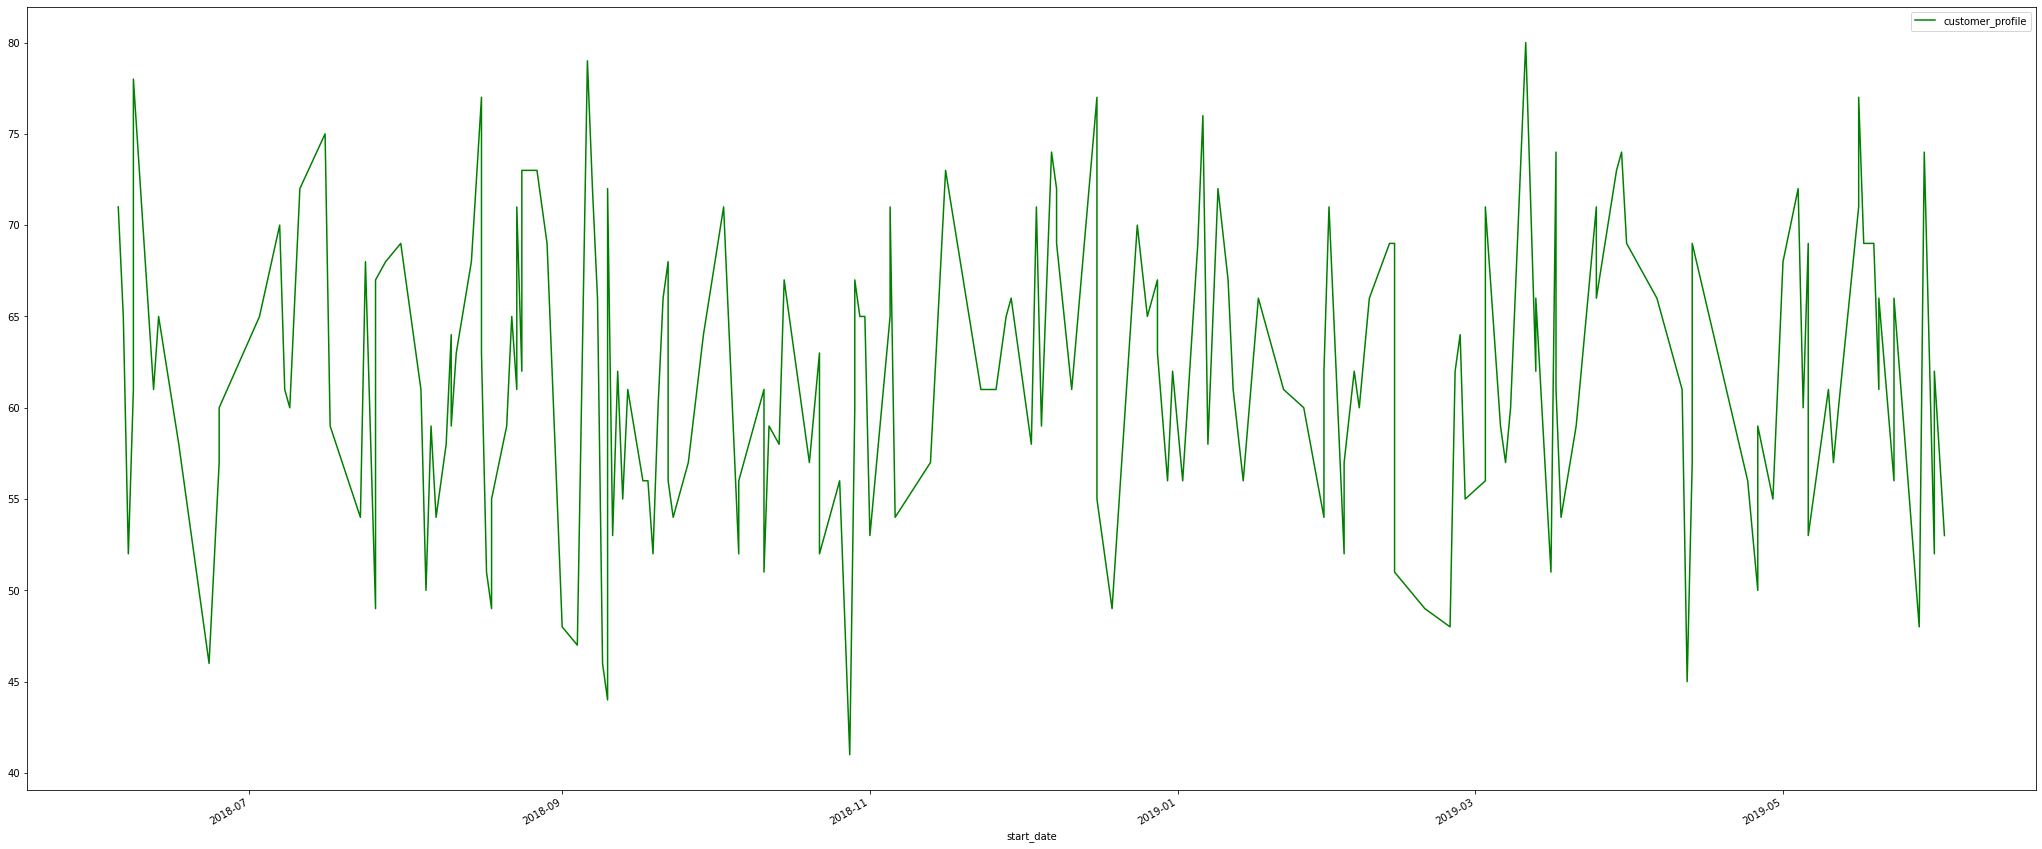

In [28]:
plt.rcParams["figure.figsize"] = (36,16)
ax = pl.plot.line(y='customer_profile',c='green')
plt.show()